In [3]:
# 1. load cleaned data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/rod_cleaned_final.csv')

## Numeric Variables for Histograms:

### Operational Parameters:

    avg_press_flowline (Average pressure in flowline)
    avg_press_tubing (Average pressure in tubing)
    avg_press_casing (Average pressure in casing)
    avg_diff_press (Average differential pressure)
    stroke_len (Stroke length)
    gross_stroke_len (Gross stroke length)
    fillage (Pump fillage efficiency)
    yesterday_avg_spm (Strokes per minute)
    max_incline (Max wellbore inclination)

### Production Metrics:

    avg_oil_vol (Average oil volume produced)
    avg_water_vol (Average water volume produced)
    avg_liquid_vol (Average total liquid volume produced)

### Mechanical Metrics:

    max_unguided_dls (Dog leg severity)
    overall_max_sideload (Overall maximum sideload)
    max_unguided_sideload (Max unguided sideload)
    enduralloy_len (Length of Enduralloy-coated sections)
    nip_set_depth (Nipple set depth)

### Log-Transformed Variables:
    Include histograms for the _log versions of these variables since they were transformed to reduce skewness.


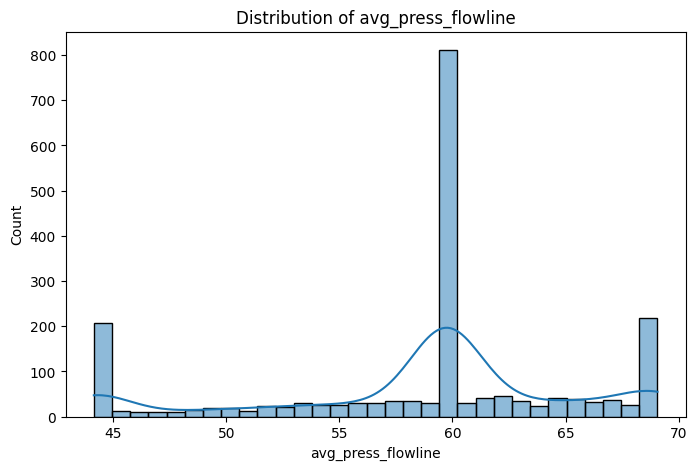

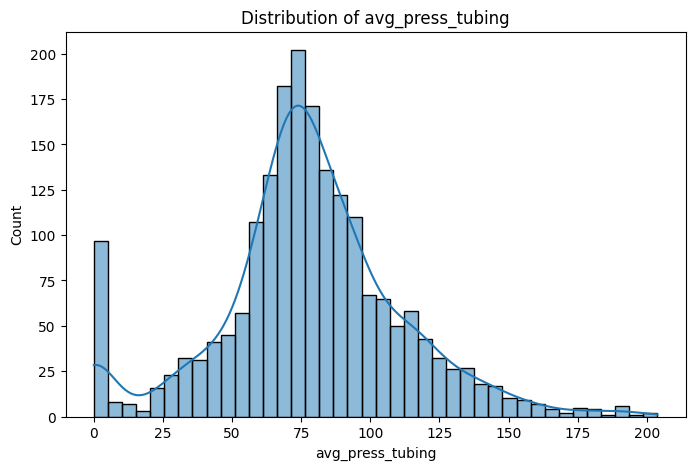

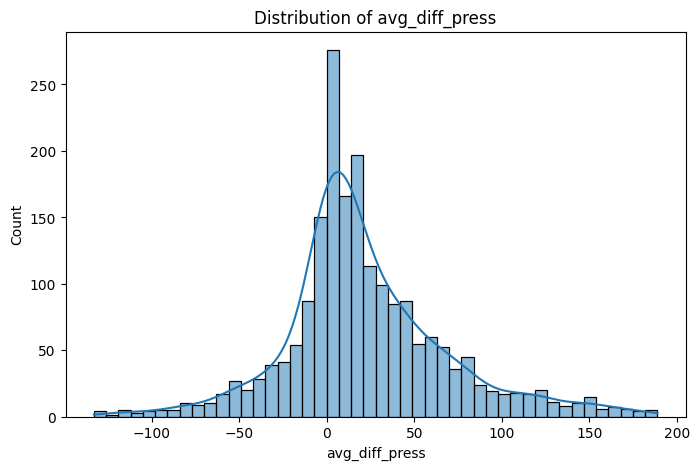

KeyError: 'stroke_len'

<Figure size 800x500 with 0 Axes>

In [4]:
# 2. Univariate Analysis

# Goal: explore distribution of individual variables.

# for numerical variables: use histogram and boxplots to see distributions and identify any remaining anomalies.

numeric_vars = ['avg_press_flowline', 'avg_press_tubing', 'avg_diff_press', 
                'stroke_len', 'gross_stroke_len', 'fillage', 'yesterday_avg_spm', 
                'avg_oil_vol', 'avg_water_vol', 'avg_liquid_vol']

for var in numeric_vars:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

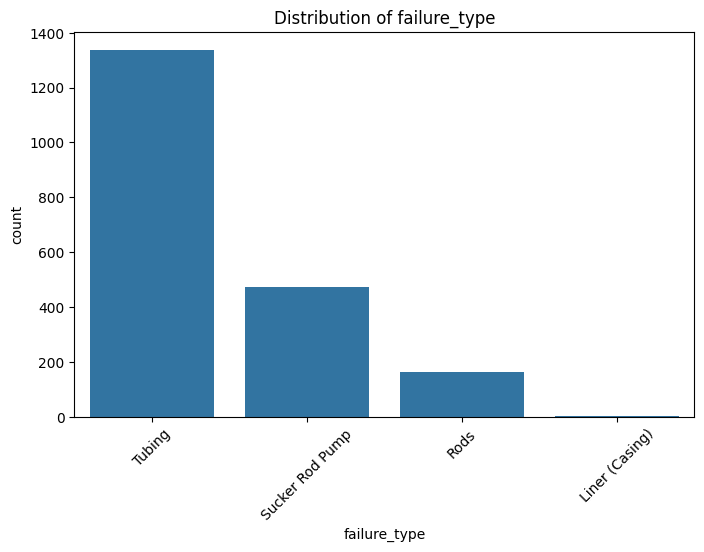

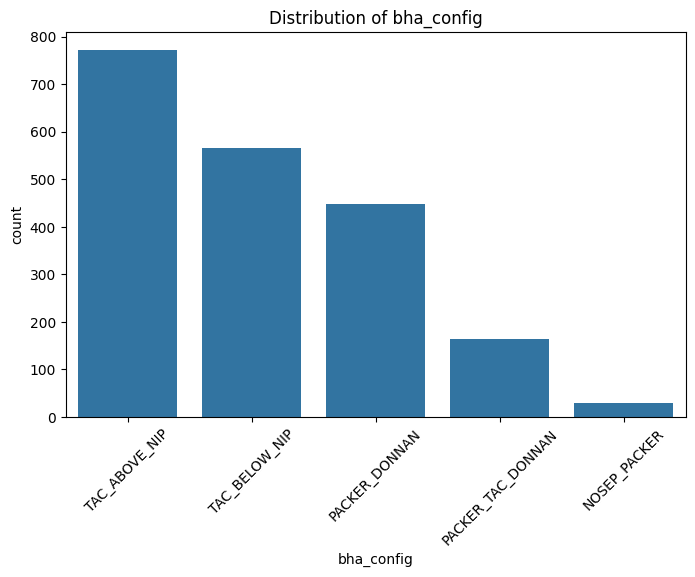

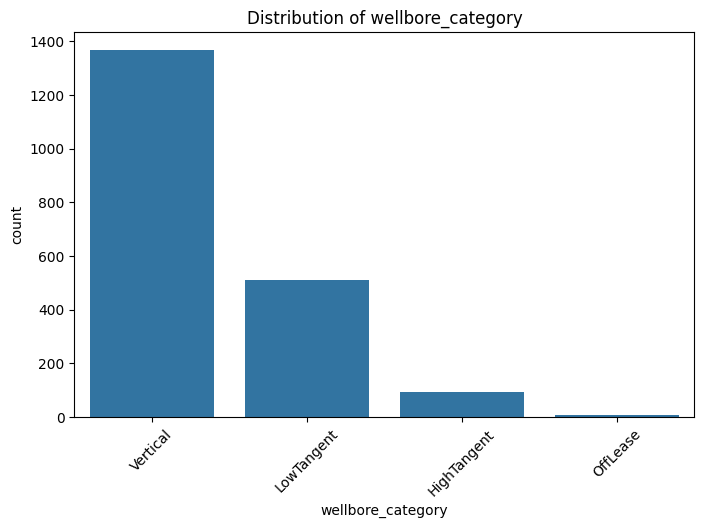

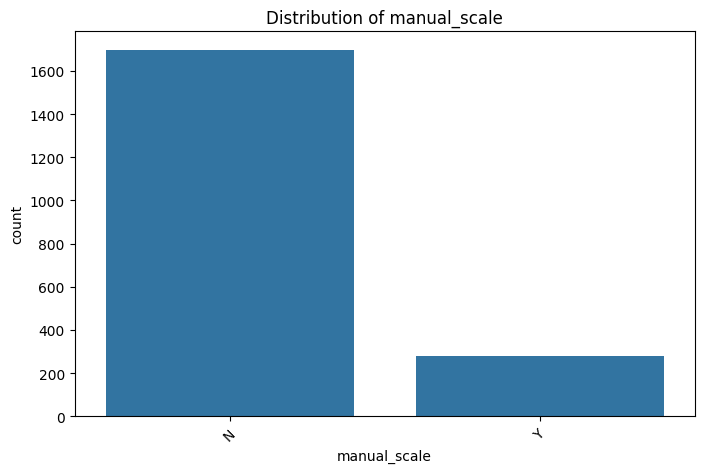

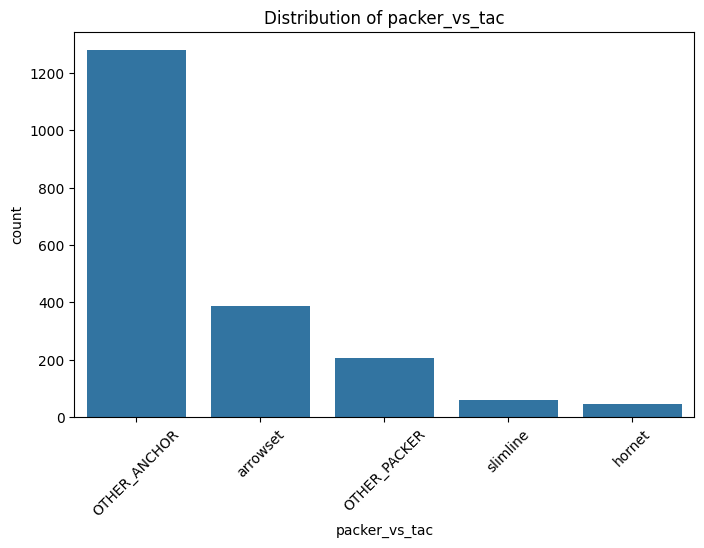

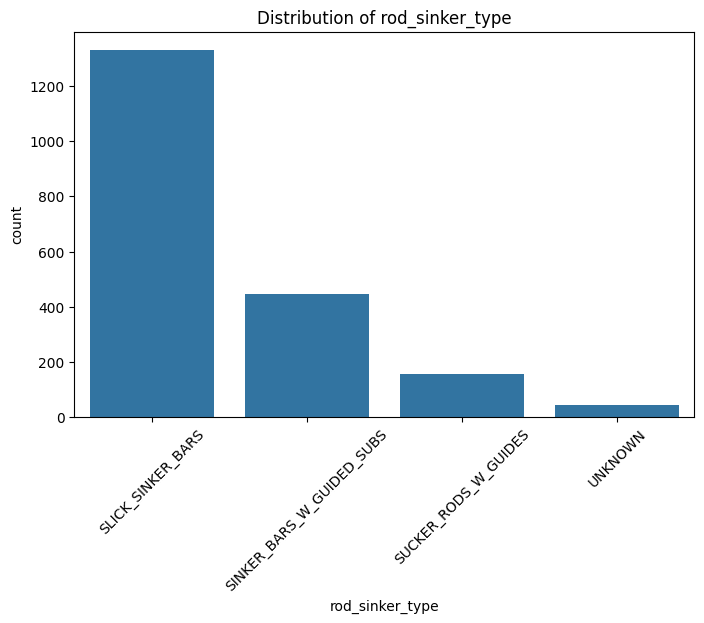

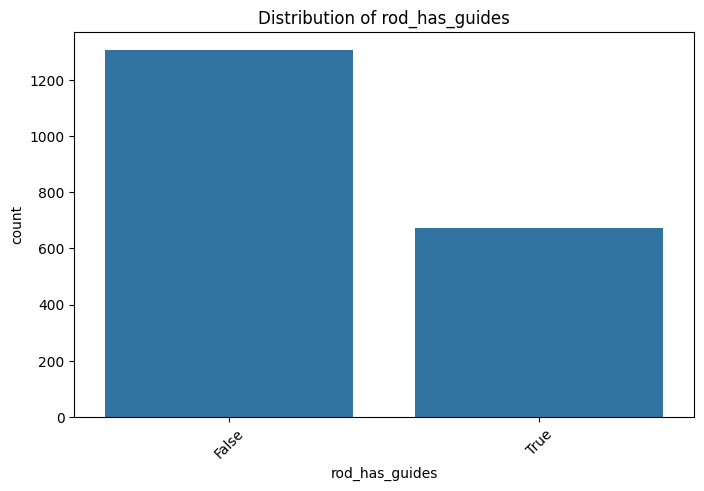

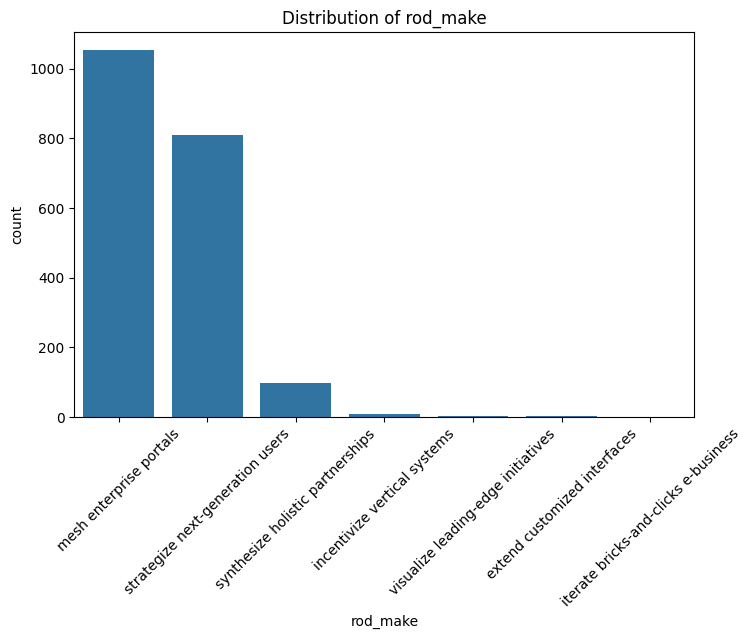

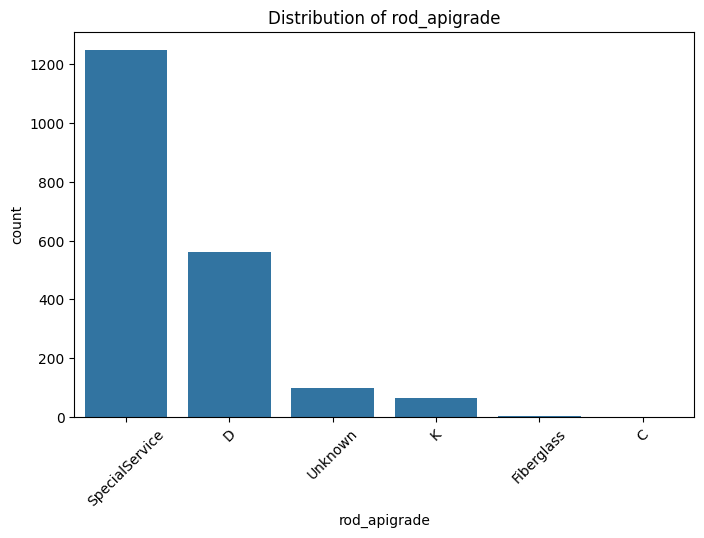

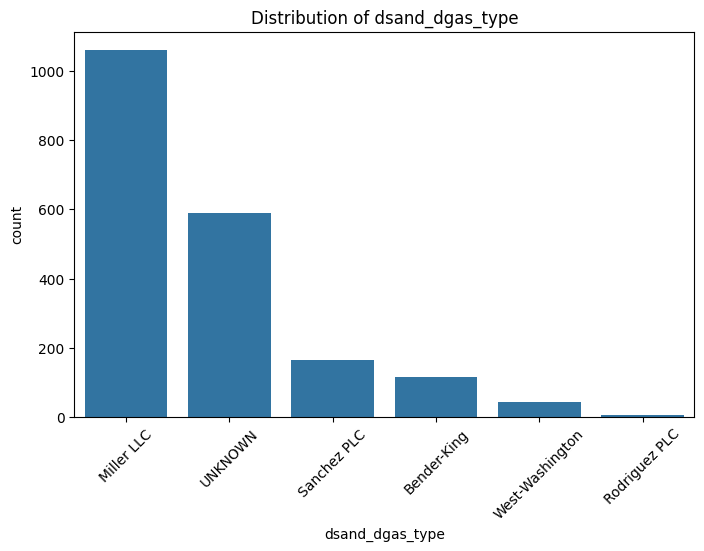

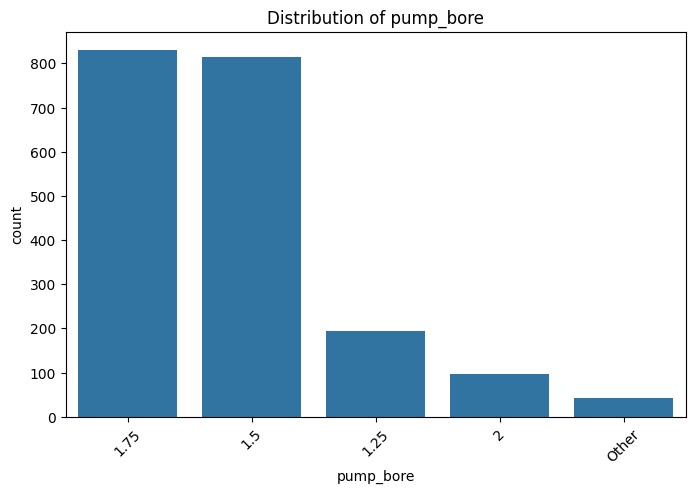

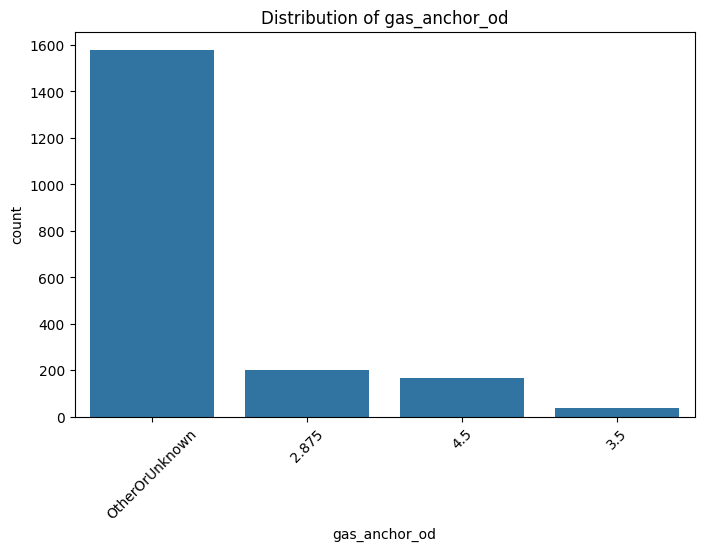

In [ ]:
# 3. Categorical Variables Analysis

# Goal: Explore distribution of categorical variables.

categorical_vars = ['failure_type', 'bha_config', 'wellbore_category', 'manual_scale', 
                   'packer_vs_tac', 'rod_sinker_type', 'rod_has_guides', 'rod_make', 
                   'rod_apigrade', 'dsand_dgas_type', 'pump_bore', 'gas_anchor_od']

for var in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=var, order=df[var].value_counts().index)
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)
    plt.show()


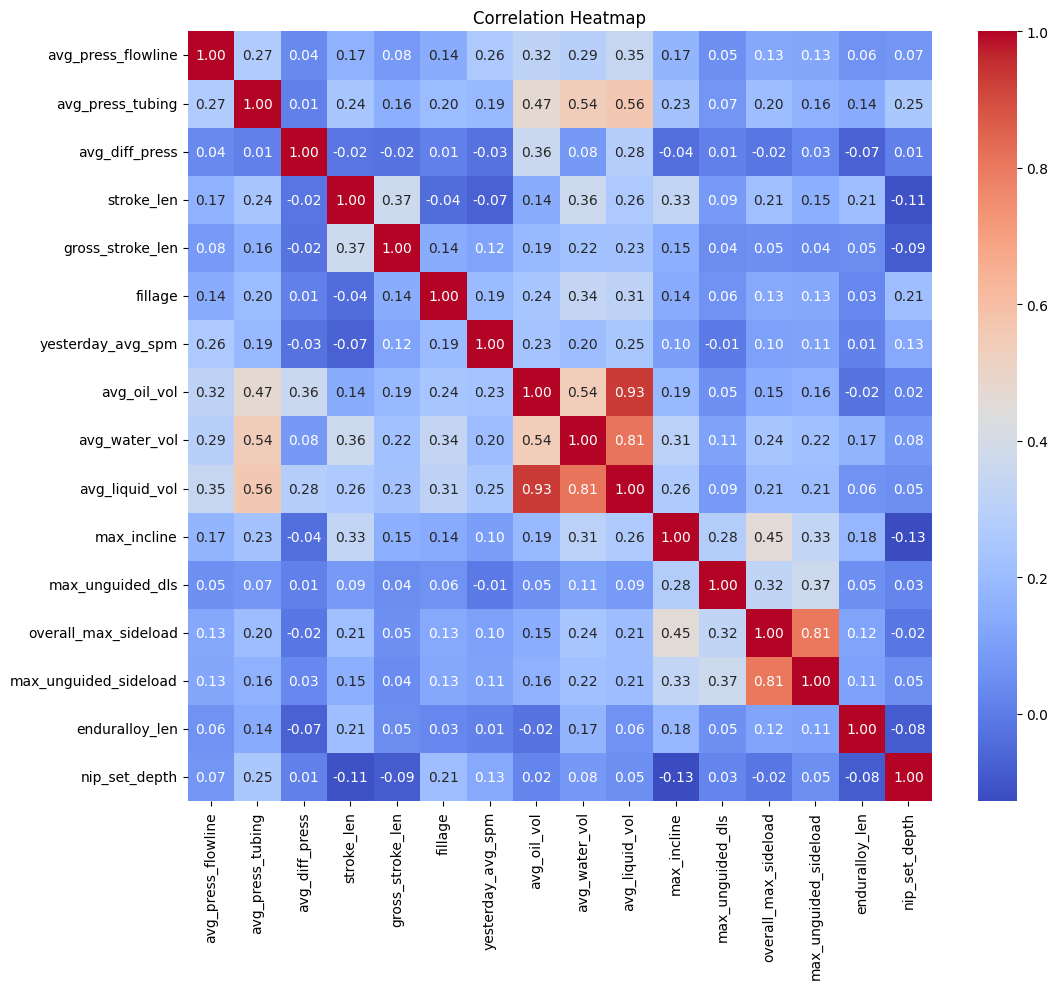

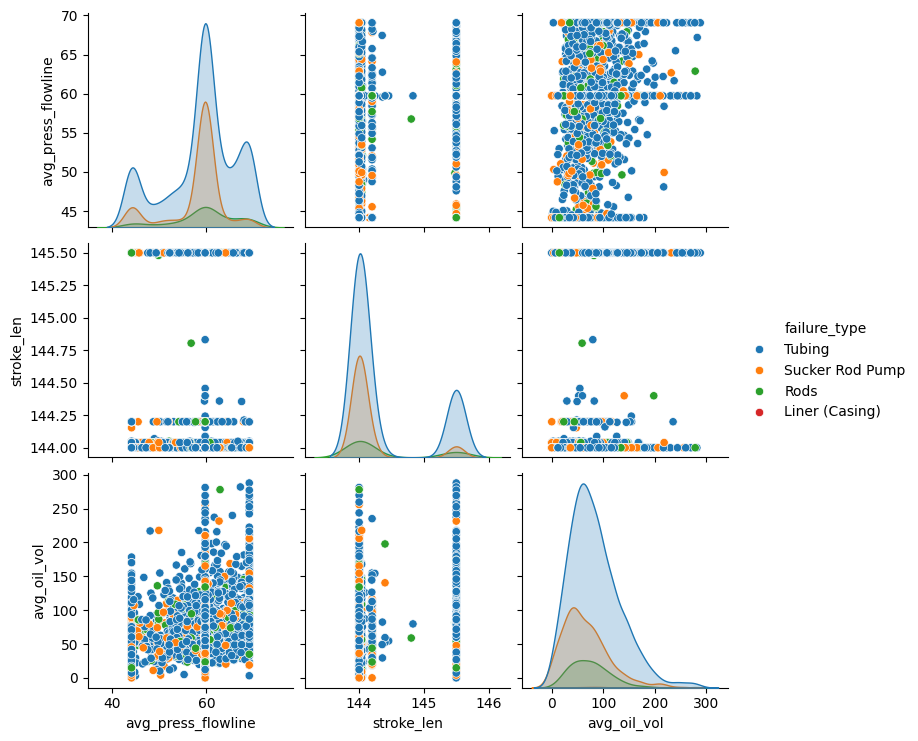

In [ ]:
# 2.3 Next Steps: Bivariate Analysis

# Goal: Explore relationships between variables.

# Example code to start:
# Correlation heatmap for numeric variables
plt.figure(figsize=(12, 10))
numeric_vars = ['avg_press_flowline', 'avg_press_tubing', 'avg_diff_press', 'stroke_len', 'gross_stroke_len', 'fillage', 'yesterday_avg_spm', 'avg_oil_vol', 'avg_water_vol', 'avg_liquid_vol', 'max_incline', 'max_unguided_dls', 'overall_max_sideload', 'max_unguided_sideload', 'enduralloy_len', 'nip_set_depth']
correlation_matrix = df[numeric_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for key variables
sns.pairplot(df, vars=['avg_press_flowline', 'stroke_len', 'avg_oil_vol'], hue='failure_type')
plt.show()



### Feature Engineering:

Consider creating new features (e.g., interaction terms or ratios) if relevant.

Perform scaling or normalization for numerical features if needed for modeling.

Encode categorical variables using techniques like one-hot encoding.

### Modeling Preparation:

Split the dataset into training and testing sets.

Perform any necessary data transformations.

Select features and target variable for the rod pump failure analysis.


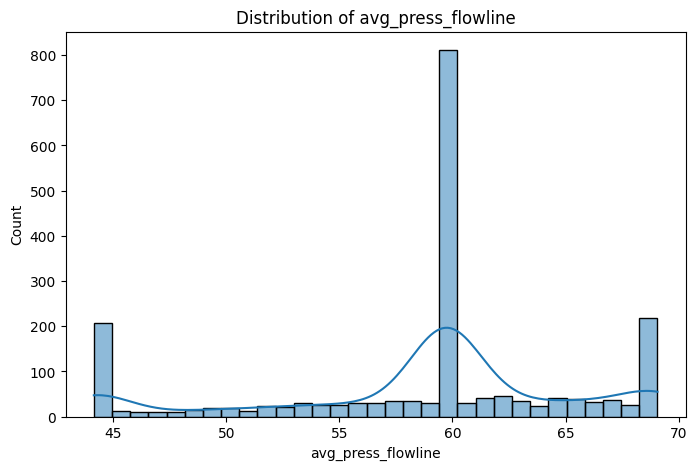

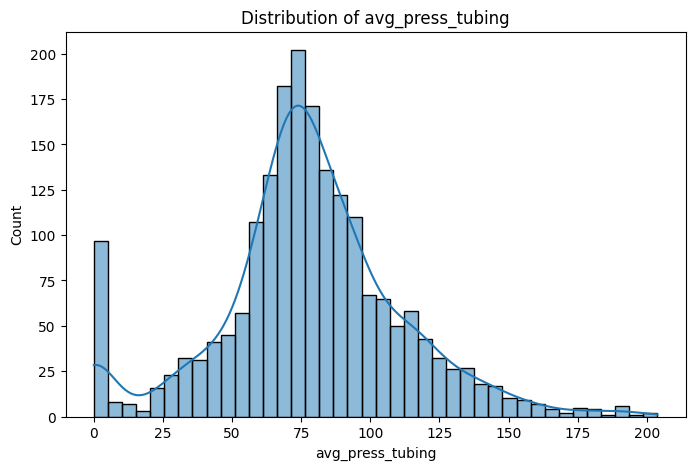

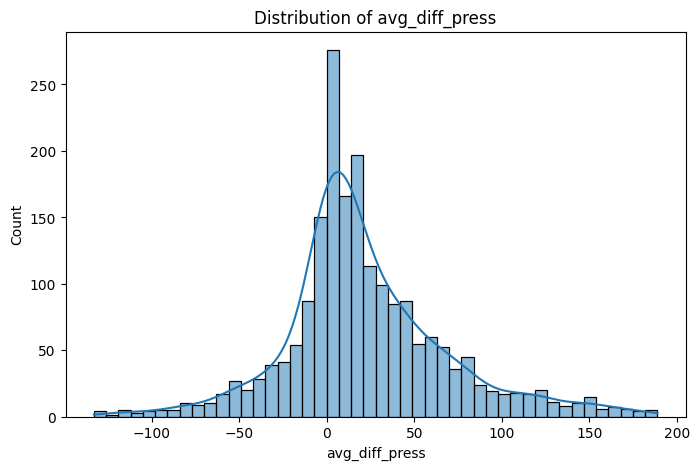

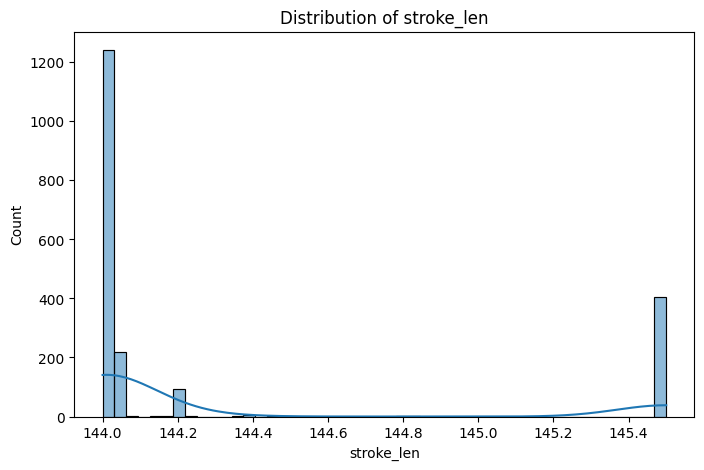

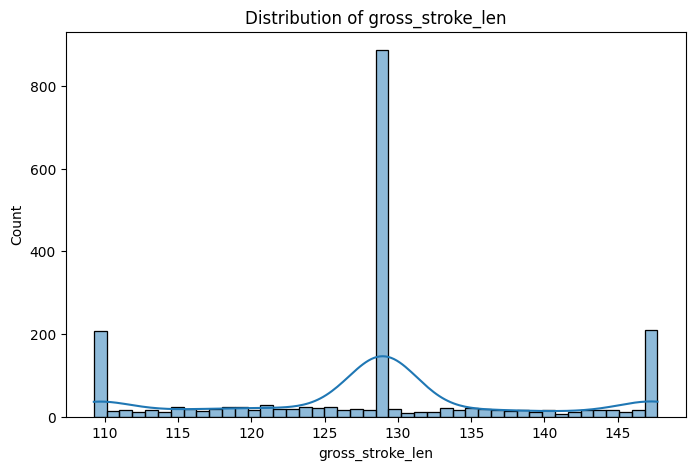

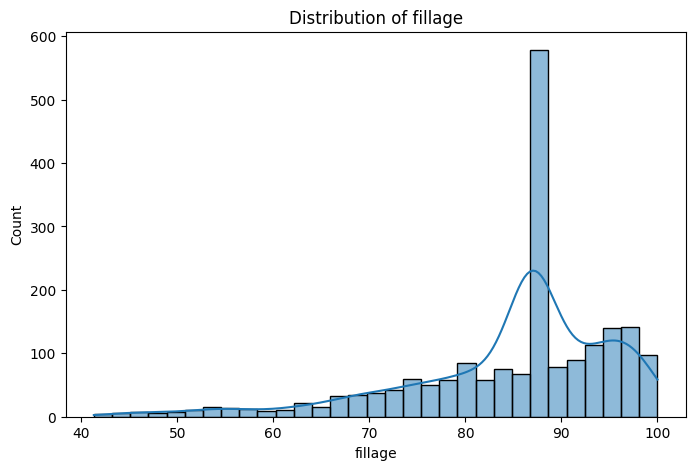

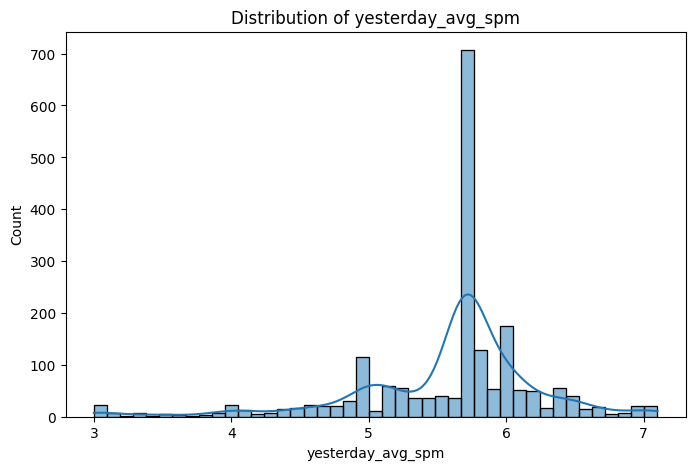

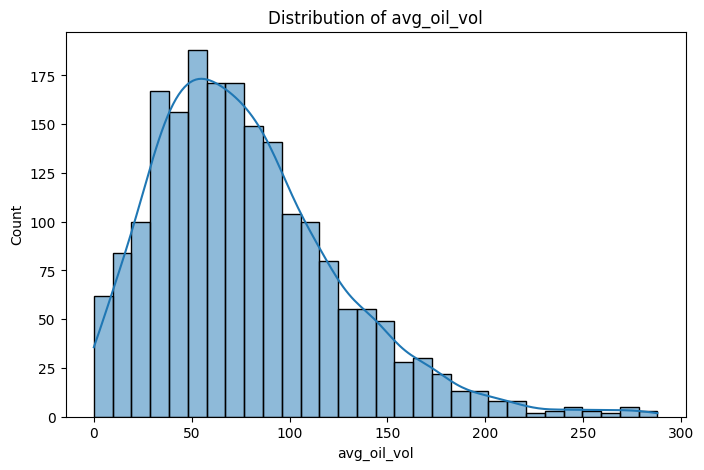

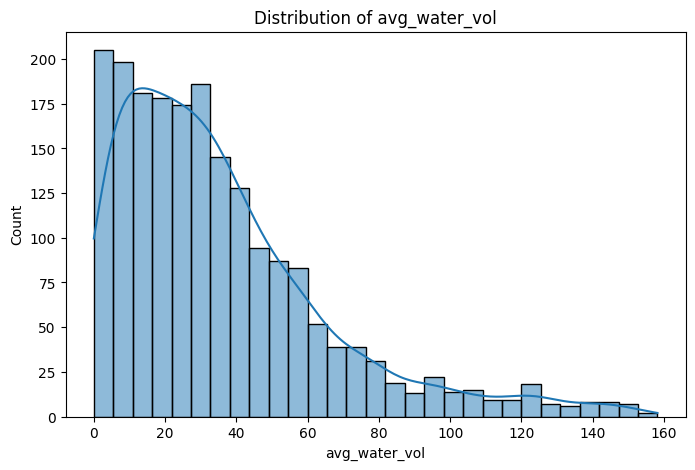

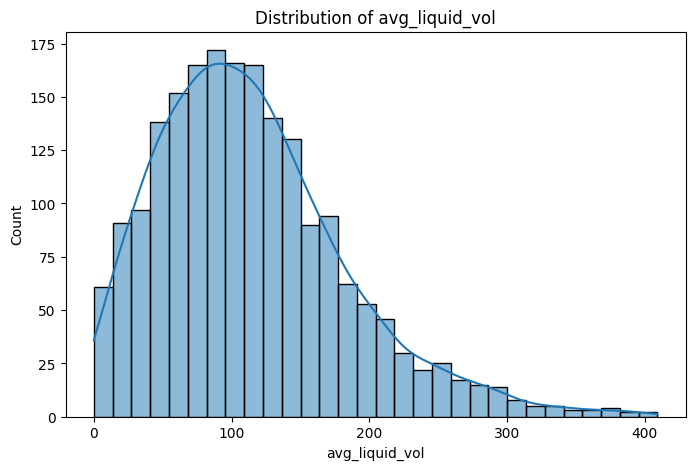

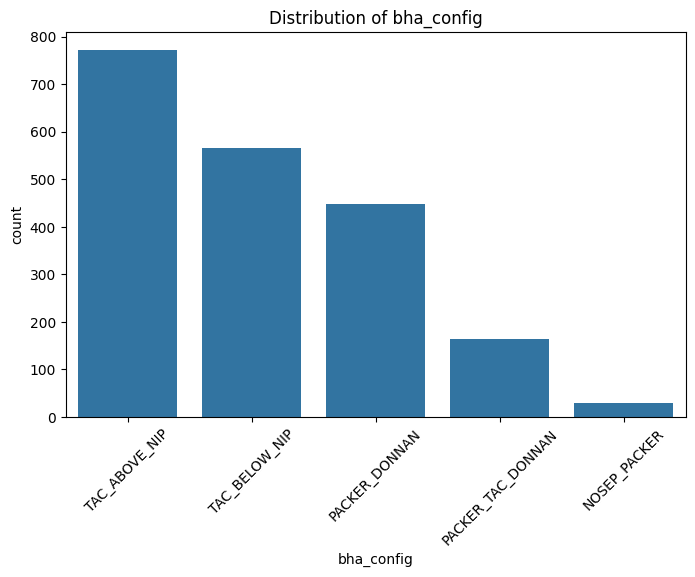

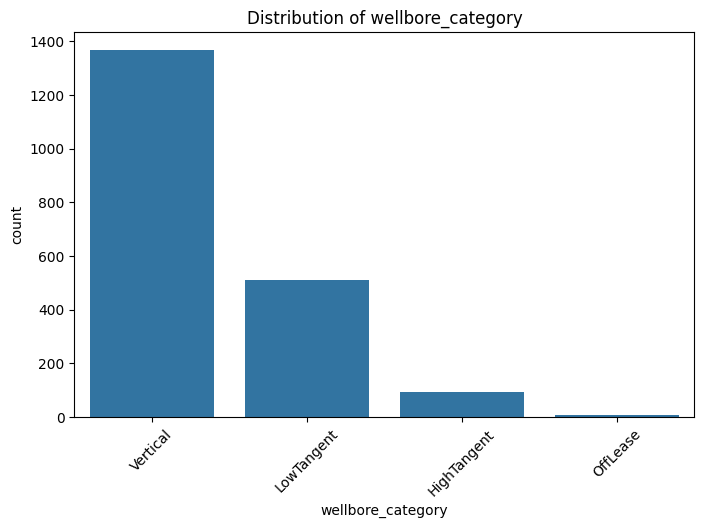

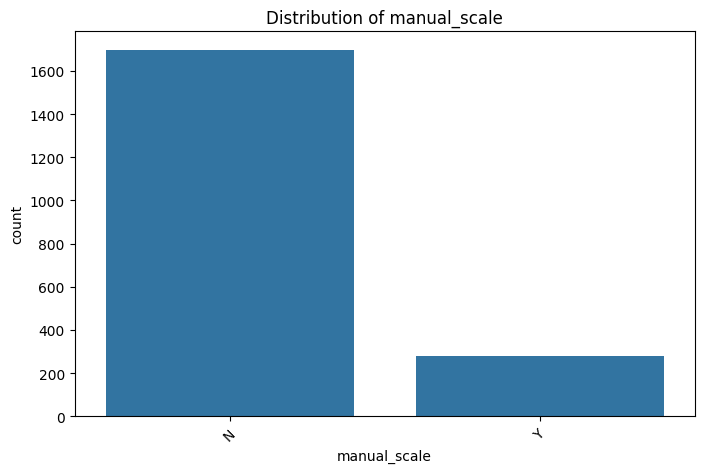

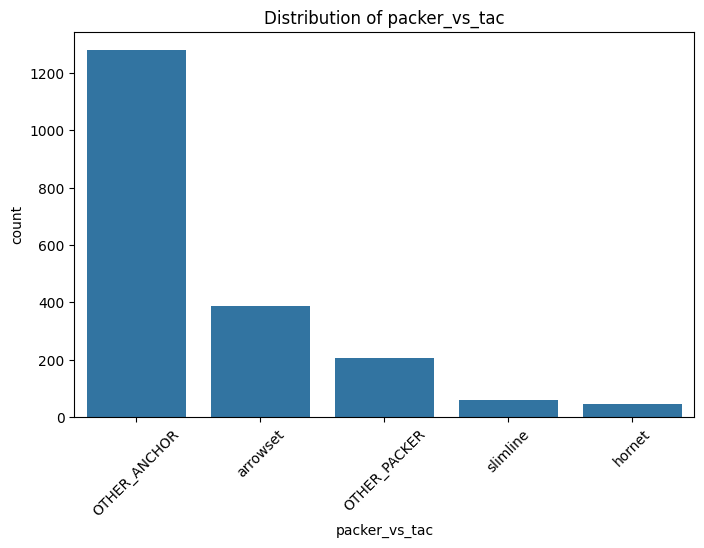

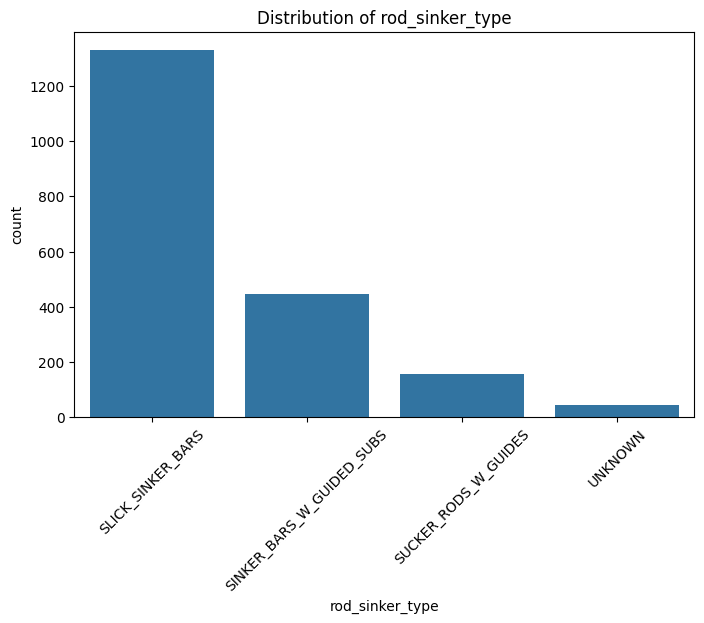

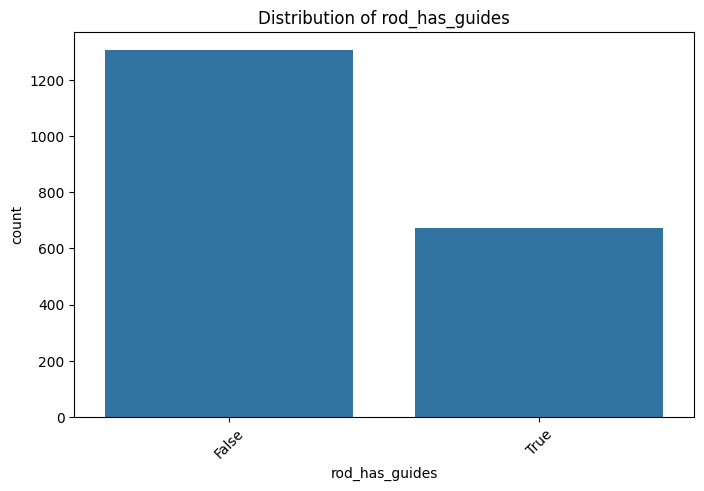

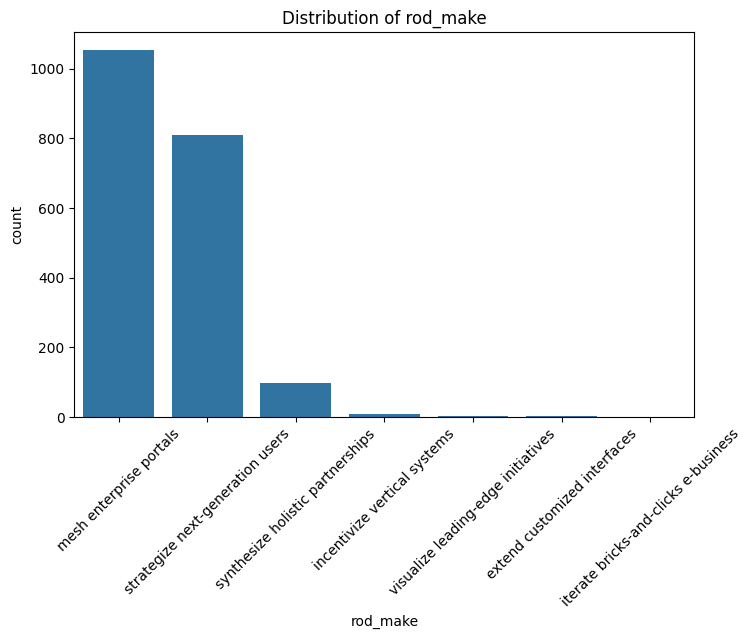

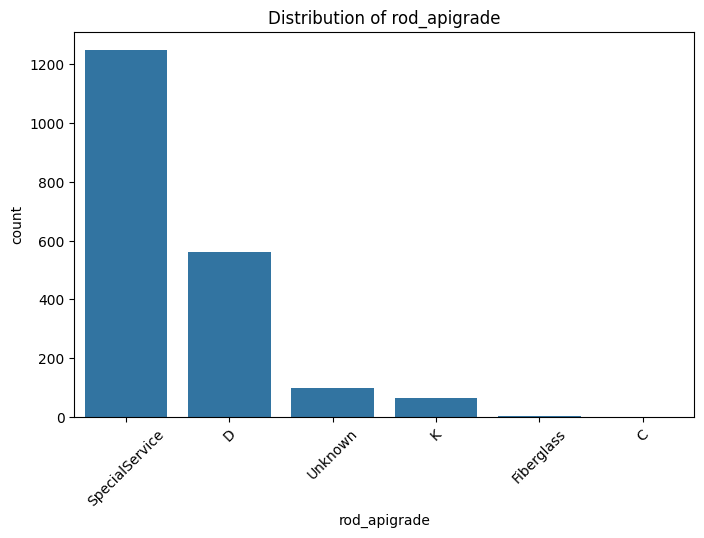

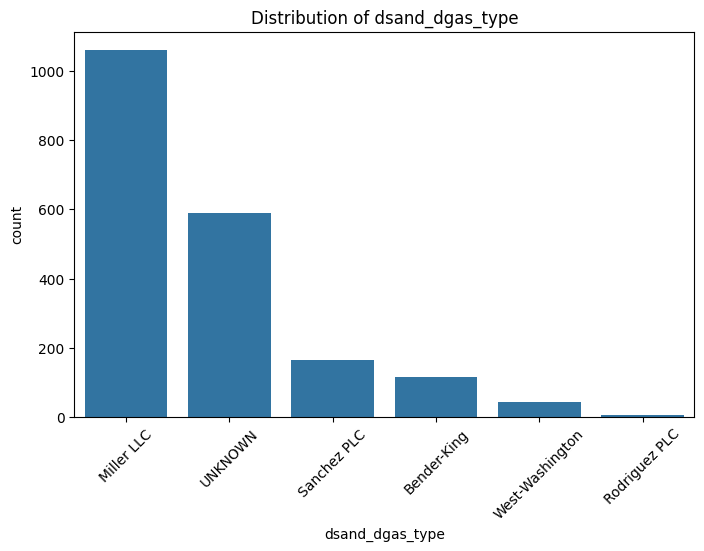

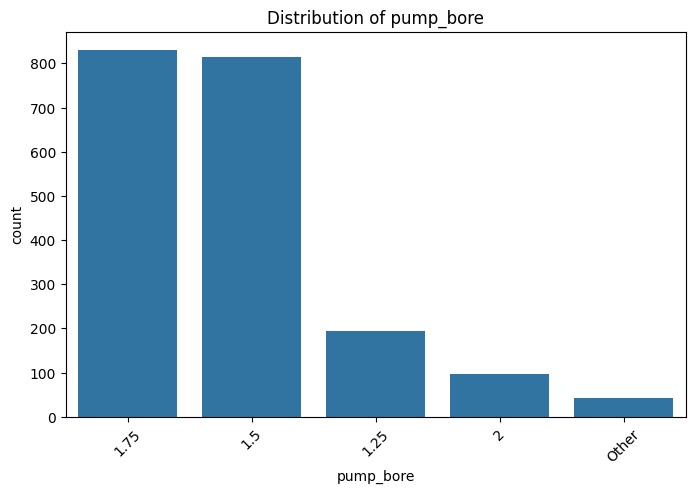

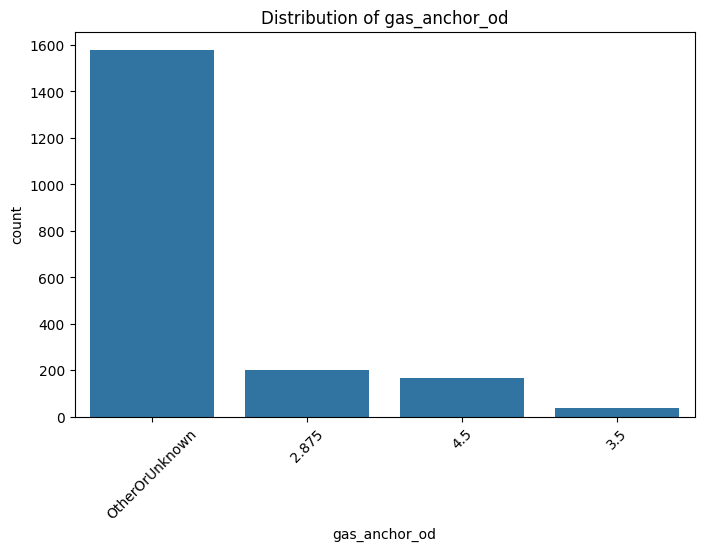

Feature Engineering Completed: New Features Added


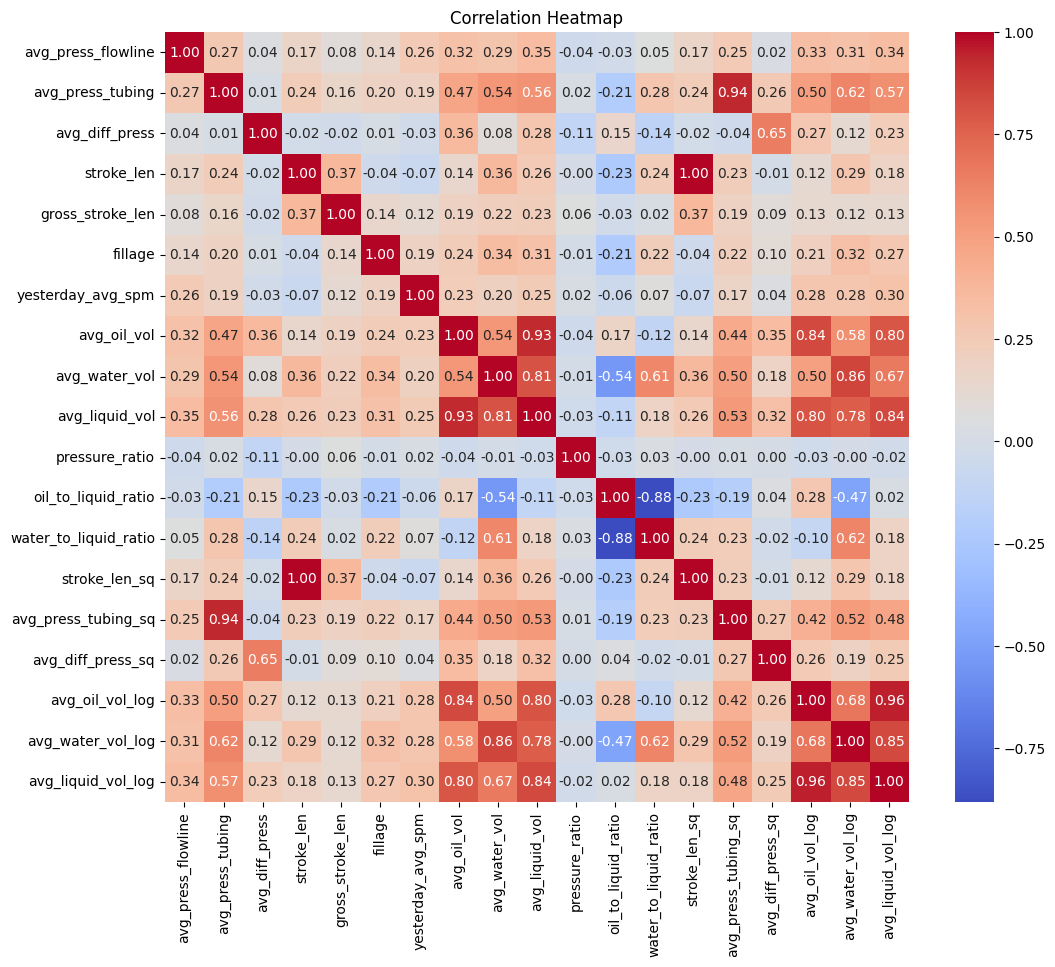

Updated dataset saved: rod_features_engineered.csv


In [ ]:
# 1. Load Cleaned Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv('rod_cleaned_final.csv', parse_dates=['bha_lifetime_start', 'bha_lifetime_end', 'failstart'])

# 2. Univariate Analysis

# Goal: Explore the distribution of individual variables.
# For numerical variables: Use histograms and boxplots to see distributions and identify any remaining anomalies.

numeric_vars = ['avg_press_flowline', 'avg_press_tubing', 'avg_diff_press', 
                'stroke_len', 'gross_stroke_len', 'fillage', 'yesterday_avg_spm', 
                'avg_oil_vol', 'avg_water_vol', 'avg_liquid_vol']

for var in numeric_vars:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

# 3. Categorical Variables Analysis

# Goal: Explore the distribution of categorical variables.

categorical_vars = ['bha_config', 'wellbore_category', 'manual_scale', 
                   'packer_vs_tac', 'rod_sinker_type', 'rod_has_guides', 'rod_make', 
                   'rod_apigrade', 'dsand_dgas_type', 'pump_bore', 'gas_anchor_od']

for var in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=var, order=df[var].value_counts().index)
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)
    plt.show()

# 4. Feature Engineering
# Goal: Create meaningful new features to better capture relationships in the data.

## 4.1 Interaction Features
# These features capture relationships between critical variables.
df['pressure_ratio'] = df['avg_press_tubing'] / (df['avg_press_casing'] + 1e-6)  # Avoid division by zero
df['oil_to_liquid_ratio'] = df['avg_oil_vol'] / (df['avg_liquid_vol'] + 1e-6)
df['water_to_liquid_ratio'] = df['avg_water_vol'] / (df['avg_liquid_vol'] + 1e-6)

## 4.2 Polynomial Features
# We square some key numeric variables to model non-linear relationships.
df['stroke_len_sq'] = df['stroke_len'] ** 2
df['avg_press_tubing_sq'] = df['avg_press_tubing'] ** 2
df['avg_diff_press_sq'] = df['avg_diff_press'] ** 2

## 4.3 Log Transformations
# Some variables have high skewness, so we apply log transformations to normalize them.
skewed_vars = ['avg_oil_vol', 'avg_water_vol', 'avg_liquid_vol']
for var in skewed_vars:
    df[f'{var}_log'] = np.log1p(df[var])  # log1p avoids issues with zero values

print("Feature Engineering Completed: New Features Added")

# 5. Next Steps: Bivariate Analysis
# Goal: Explore relationships between variables.

# Correlation heatmap for numeric variables
plt.figure(figsize=(12, 10))
numeric_vars.extend(['pressure_ratio', 'oil_to_liquid_ratio', 'water_to_liquid_ratio',
                     'stroke_len_sq', 'avg_press_tubing_sq', 'avg_diff_press_sq',
                     'avg_oil_vol_log', 'avg_water_vol_log', 'avg_liquid_vol_log'])
correlation_matrix = df[numeric_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Save the updated dataset
df.to_csv('rod_features_engineered.csv', index=False)
print("Updated dataset saved: rod_features_engineered.csv")


In [ ]:
# Random Forest Classifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("rod_cleaned_final.csv")

# Convert the target variable (failure type) into a binary classification
df["failure_type_binary"] = df["failure_type"].apply(lambda x: 1 if x == "Sucker Rod Pump" else 0)

# Select only numeric features for modeling
features = df.select_dtypes(include=[float, int]).drop(columns=["failure_type_binary"])  # Exclude target
target = df["failure_type_binary"]  # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

# Standardize the numeric features (improves model performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model with 100 trees (n_estimators=100)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# predict on the test dataset
y_pred = rf_model.predict(X_test_scaled)

# Compute accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print classification report (detailed breakdown)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       301
           1       0.64      0.36      0.46        95

    accuracy                           0.80       396
   macro avg       0.73      0.65      0.67       396
weighted avg       0.78      0.80      0.78       396

Accuracy: 0.7980
Precision: 0.6415
Recall: 0.3579
F1-Score: 0.4595


The Random Forest Classifier achieved:
* accuracy : 79.8%
* precision: 64.2%
* recall: 35.8%
* f-1 score: 45.9%

While accuracy is high, the recall is relatively low, meaning the model struggles to detect actual failures. Possible next steps:

Feature Importance Analysis: Identify which features contribute most to predictions.
Hyperparameter Tuning: Improve recall using GridSearchCV.
Try Different Models: Logistic Regression, XGBoost, etc

In [ ]:

# Step 1: Extract feature importance scores from the trained model
feature_importances = rf_model.feature_importances_

# Step 2: Create a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importances
})

# Step 3: Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Step 4: Select the top 15 features
top_15_features = feature_importance_df.head(15)

# Display the top 15 features
print(top_15_features)


              Feature  Importance
48  avg_water_vol_log    0.061005
18   avg_press_tubing    0.056183
22      avg_water_vol    0.053166
15     gas_anchor_len    0.045406
19   avg_press_casing    0.043608
23     avg_liquid_vol    0.039797
21        avg_oil_vol    0.036906
20     avg_diff_press    0.036252
32      nip_set_depth    0.035835
51  nip_set_depth_log    0.031902
25              route    0.031278
47    avg_oil_vol_log    0.030304
16        max_incline    0.028958
46    max_incline_log    0.028835
37        fillage_log    0.028081


/var/folders/dm/y0wy_ncs3qn20cs4xdn9sfq00000gn/T/ipykernel_19213/2325967600.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_features["Importance"], y=top_15_features["Feature"], palette="viridis")


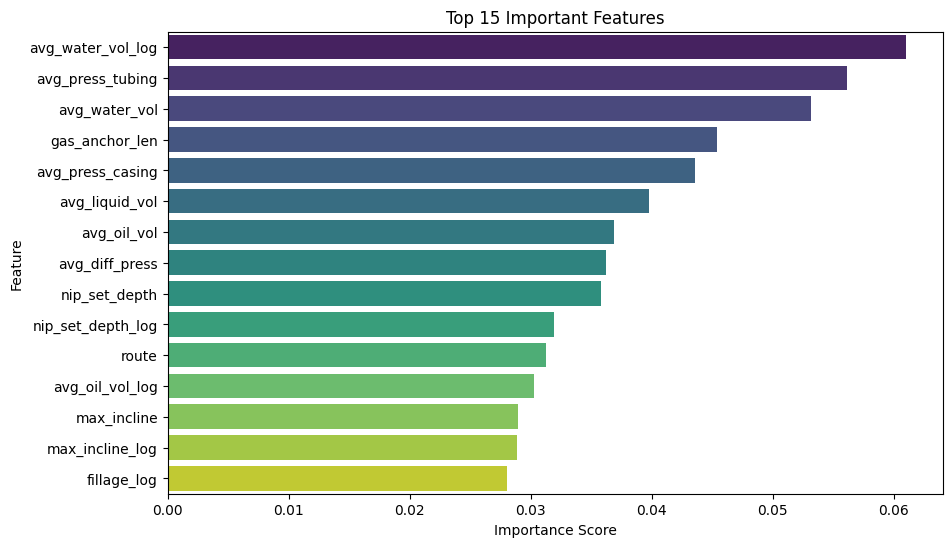

In [ ]:
# visualize with bar chart

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_features["Importance"], y=top_15_features["Feature"], palette="viridis")
plt.title("Top 15 Important Features")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


The top five most important features in predicting rod pump failures are:

1. avg_water_vol_log (Log-transformed average water volume)
2. avg_press_tubing (Average pressure in the tubing)
3. avg_water_vol (Average volume of water produced)
4. gas_anchor_len (Length of the gas anchor used in the well)
5. avg_press_casing (Average pressure in the casing)

These features have the highest impact on the model’s predictions.